<a href="https://colab.research.google.com/github/SANDRAJACOB1/Employee-Promotion-Prediction/blob/main/Project_SANDRA_JACOB_HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EMPLOYEE PROMOTION PREDICTION - HR ANALYSIS**

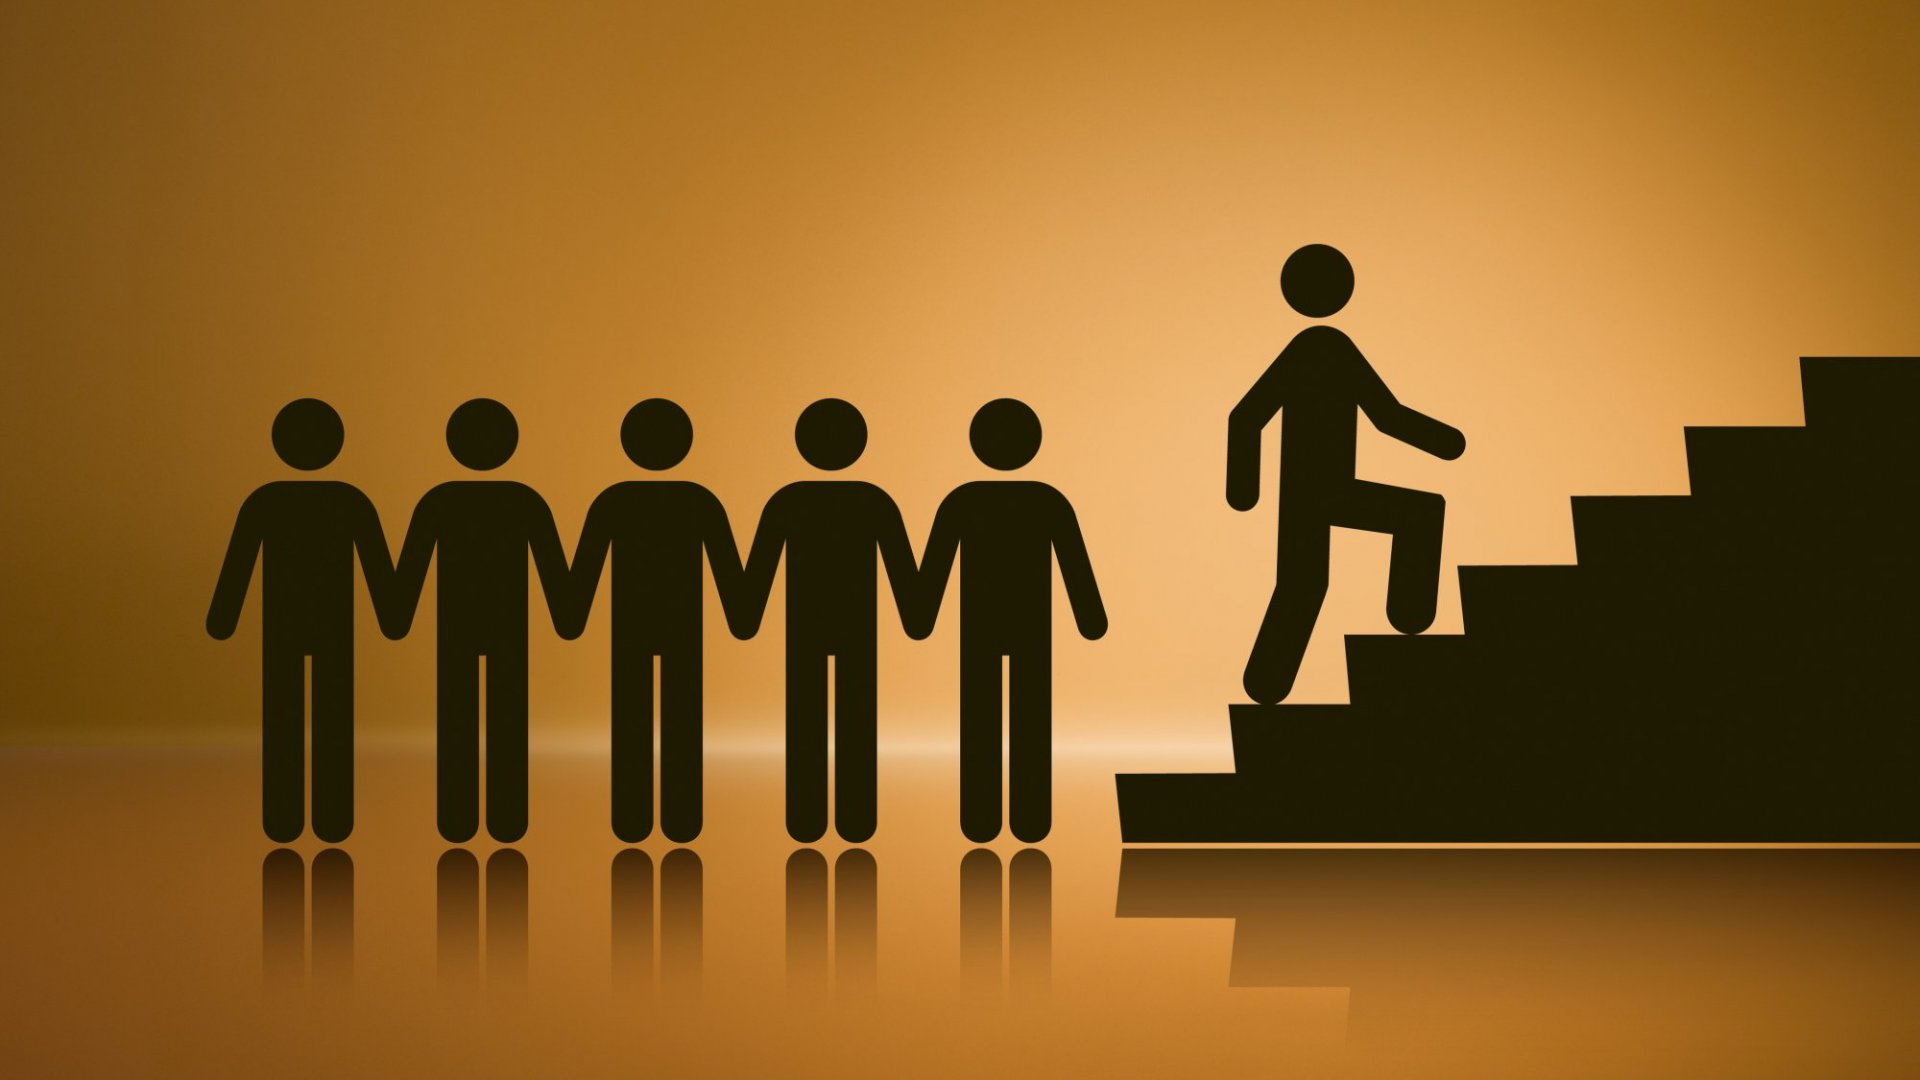

**Why to Predict HR analysis?**

Predictive HR analysis, also known as people analytics or workforce analytics, involves using data, statistical algorithms, and machine learning techniques to make predictions about future HR-related outcomes.
The goal is to improve decision-making and optimize various HR processes.

**PROJECTIVE OBJECTIVES**

1. Develop a Machine Learning model to predict whether employees will be promoted or not.
2. Identify key factors that influence promotion decisions.
3. Provide actionable insights for employees to enhance their performance and increase their chances of promotion based on predictive factors.

In my project, I utilized advanced machine learning techniques to predict employee promotions, leveraging an extensive HR analytics dataset. By analyzing crucial features such as Department, Region, Education, Gender, Recruitment channel, Training history, Age, Previous year rating, Length of service, KPIs met (>80%), Awards won, and Average training score, my model provides real-time insights into promotion outcomes. This application isn't confined to the realm of research; it has practical implications for organizations, suggesting that MNCs and other enterprises could employ my approach for more accurate predictions than traditional manual methods. By embracing data science in HR management, my project empowers organizations to streamline talent identification and development processes, enabling them to make informed decisions and gain a competitive edge in today's dynamic business environment.

**DATA DESCRIPTION**

**The dataset provided to us contains 54807 rows, and 14 different independent features. We aim to predict whether the employee is promoted or not. This is clearly a Classification probelm and we will train the Classification models to predict the desired outputs. Mentioned below are the details of the features provided to us, which we will be feeding to our model to train it.**

1. **employee_id:** Unique Identifier for Each Employee
2. **department:** Categorization of Employees into Different Departments
3. **region:** Geographical Region of Employee's Work Location
4. **education:** Employee's Educational Background
5. **gender:** Distribution of Employees by Gender
6. **recruitment_channel:** Source through which Employees were Recruited
7. **no_of_trainings:** Count of Training Programs Attended by Each Employee
8. **age:** Age of Employees
9. **previous_year_rating:** Performance Rating of Employees from the Previous Year
10. **length_of_service:** Duration of Employment with the Company
11. **KPIs_met >80%:** Indicates whether the employee has met more than 80% of their Key Performance Indicators.
12. **awards_won?:** A binary indicator showing whether the employee has received any formal awards or recognitions.
13. **avg_training_score:** The average score achieved by the employee across all training programs attended.
14. **is_promoted:** A binary indicator showing whether the employee has been promoted.



**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

**MOUNTING GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING DATASET**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/HR_dataset/train_LZdllcl.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
#To print the first five rows

df.head().style.background_gradient(cmap='Set3')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000000,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000000,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000000,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000000,2,0,0,73,0


In [5]:
#To print the last five rows

df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
#To print the dimentionality of the dataframe

df.shape

(54808, 14)

In [7]:
#To print the column labels

df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
#To print the datatypes of each column

df.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


**DEFINING THE PROBLEM STATEMENT**

Develop a predictive model to forecast whether an employee will be promoted within the organization.

Target variable: **is_promoted**


Predictors:KPIs_met>80%, Awards_won?, avg_training_score, previous_year_rating, no_of_trainings, length_of_service etc.

Is_Promoted = 0 (Not Promoted)

Is_Promoted = 1 (Promoted)

Based on the problem statement its clear that we have to create **SUPERVISED MACHINE LEARNING CLASSIFICATION MODEL**, as the target variable is categorical.

In [9]:
#Determining the unique values in the dataset

for i in df.columns:
  print(i,'\n',df[i].unique())

employee_id 
 [65438 65141  7513 ... 13918 13614 51526]
department 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 
 ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 
 ['f' 'm']
recruitment_channel 
 ['sourcing' 'other' 'referred']
no_of_trainings 
 [ 1  2  3  4  7  5  6  8 10  9]
age 
 [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 
 [ 5.  3.  1.  4. nan  2.]
length_of_service 
 [ 8  4  7 10  2  5  

In [10]:
#Checking for the missing values

df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [11]:
#Checking for duplicate values

df.duplicated().sum()

0

In [12]:
#For the concise summary of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
#To print the descriptive statistics of the Dataframe

df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
#To print the descriptive statistics of columns with object datatype in the Dataframe

df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [15]:
#To print the number of distinct(unique) values in each column in the Dataframe

df.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [16]:
#Handling missing values

df['education']=df['education'].fillna('unknown')
df=df.dropna()
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [17]:
#Dropping unnecessary columns

df=df.drop(columns=['employee_id'],axis=1)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,unknown,m,sourcing,1,29,1.0,2,0,0,45,0


**EXPLORATORY DATA ANALYSIS**

Categorical variable : Counter plot, Bar plot , Pie plot

Continuous variable : Histogam

In [18]:
#department based analysis

dep_count=df['department'].value_counts().sort_values(ascending=False)
dep_count

,count
department,
Sales & Marketing,15529
Operations,10760
Procurement,6709
Technology,6592
Analytics,4886
Finance,2253
HR,2172
R&D,912
Legal,871


Text(0, 0.5, 'Count')

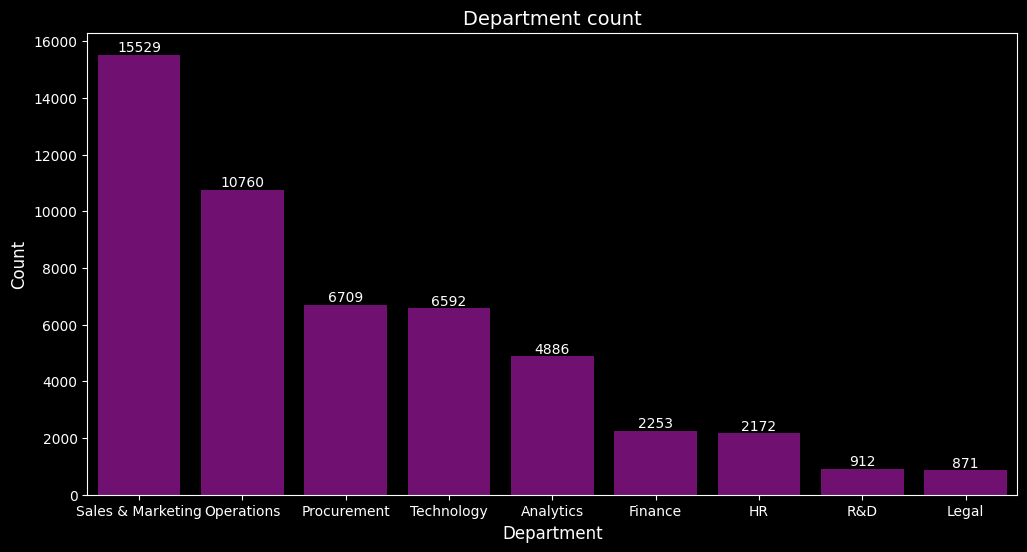

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='department',data=df,order=dep_count.index,color='purple')
for index, value in enumerate(dep_count):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Department count',size=14)
plt.xlabel('Department',size=12)
plt.ylabel('Count',size=12)

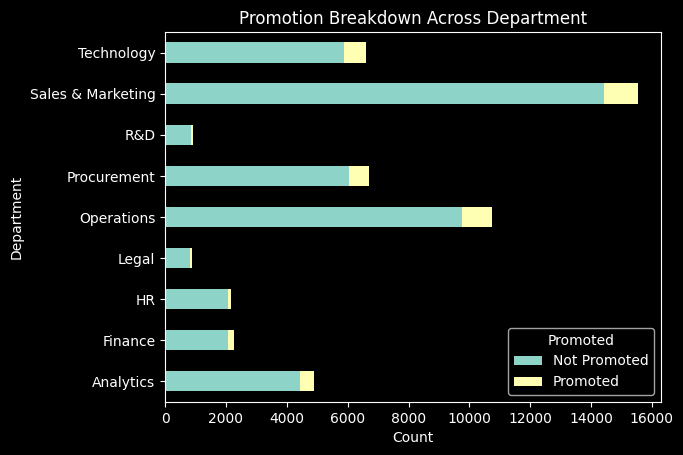

In [20]:
pro_count_dep=df.groupby(['department', 'is_promoted']).size().unstack(fill_value=0)
pro_count_dep.plot(kind='barh', stacked=True)
plt.title('Promotion Breakdown Across Department')
plt.ylabel('Department')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])
plt.show()

In [21]:
#gender based analysis

gender_count=df['gender'].value_counts()
gender_count

,count
gender,
m,35530
f,15154


Text(0.5, 1.0, 'Gender Count')

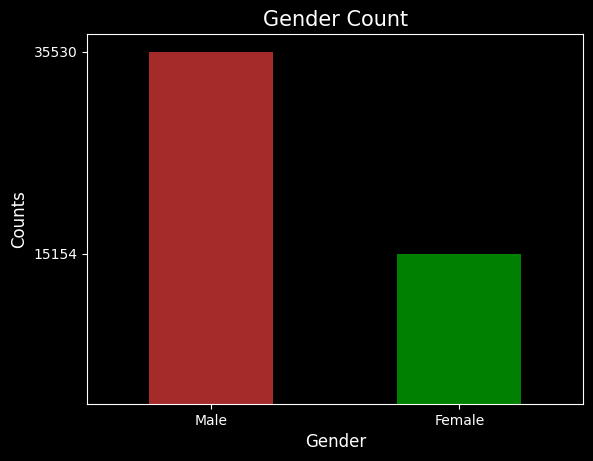

In [22]:
gender_count.plot(kind='bar',color=['brown','green'])
plt.xlabel('Gender',fontsize=12)
plt.ylabel("Counts",fontsize=12)
plt.yticks(gender_count.values)
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.title('Gender Count',size=15)

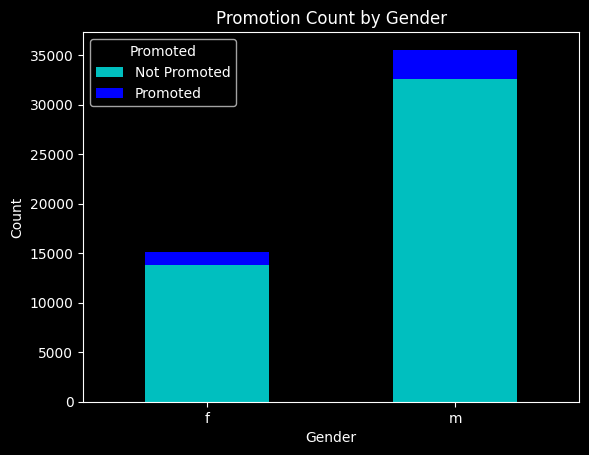

In [23]:
prom_count_gender=df.groupby(['gender', 'is_promoted']).size().unstack(fill_value=0)
prom_count_gender.plot(kind='bar', stacked=True,color=['c','b'])
plt.title('Promotion Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])
plt.show()


Text(0.5, 1.0, 'Distribution of Gender Across Departments')

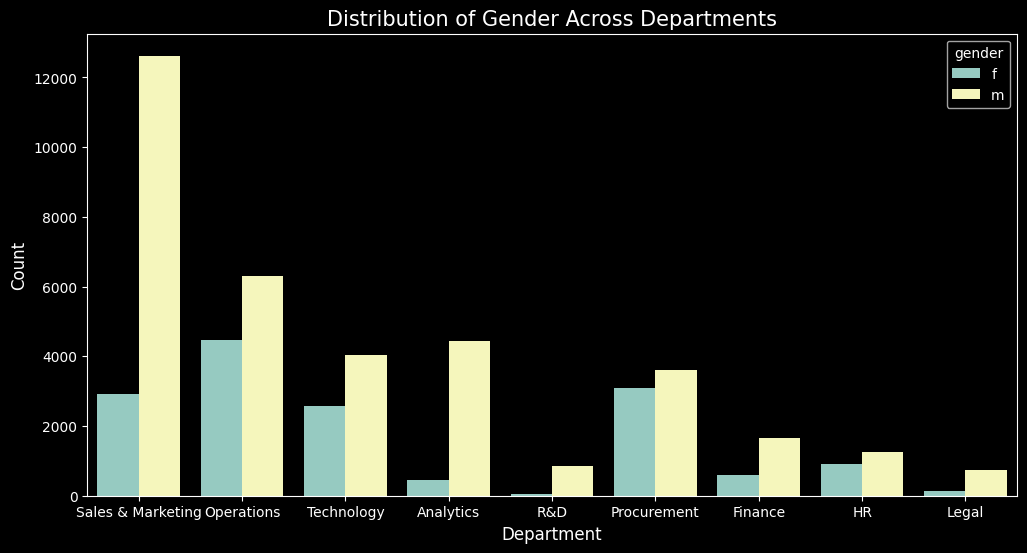

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='department',data=df,hue='gender')
plt.xlabel('Department',size=12)
plt.ylabel("Count",size=12)
plt.title("Distribution of Gender Across Departments",size=15)

In [25]:
#education based analysis

edu_count=df['education'].value_counts()
edu_count

,count
education,
Bachelor's,33404
Master's & above,14798
unknown,2024
Below Secondary,458


<Axes: xlabel='department', ylabel='count'>

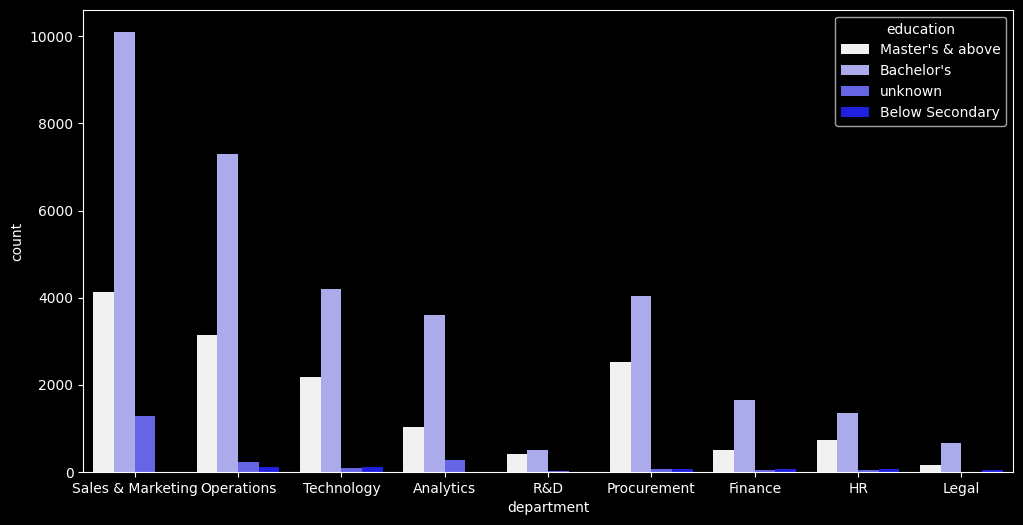

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='department',data=df,hue='education',palette='light:blue')

In [27]:
df.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


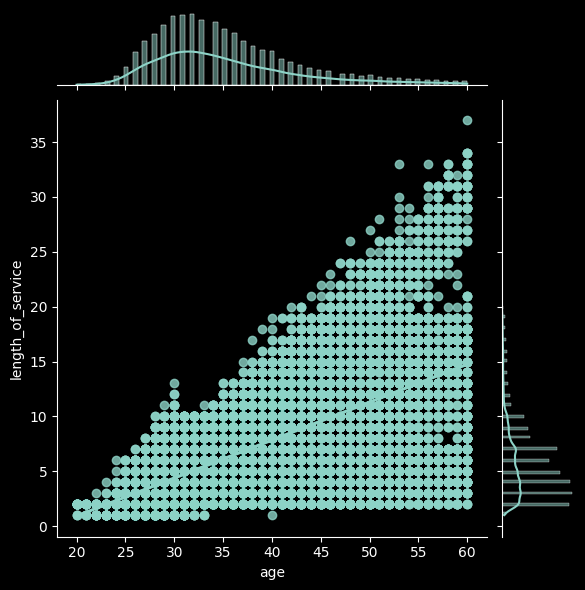

In [28]:
sns.jointplot(x='age',y='length_of_service',data=df,kind='reg')

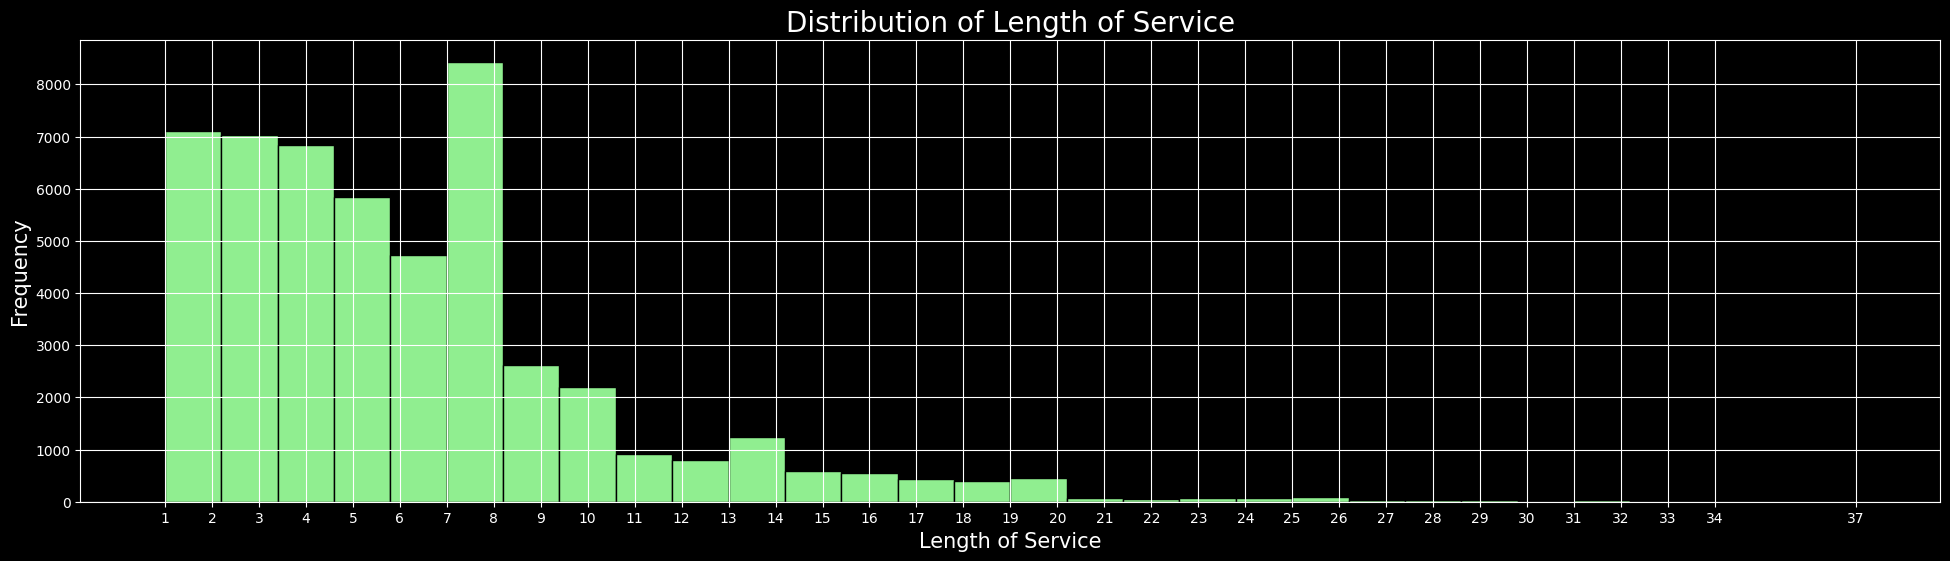

In [29]:
#length_of_service based analysis

length_of_service=df['length_of_service']
plt.figure(figsize=(24, 6))
plt.hist(length_of_service,bins=30,color='lightgreen',edgecolor='black')
plt.title("Distribution of Length of Service",fontsize=20)
plt.xlabel("Length of Service",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xticks(length_of_service.unique())
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Age of Employees')

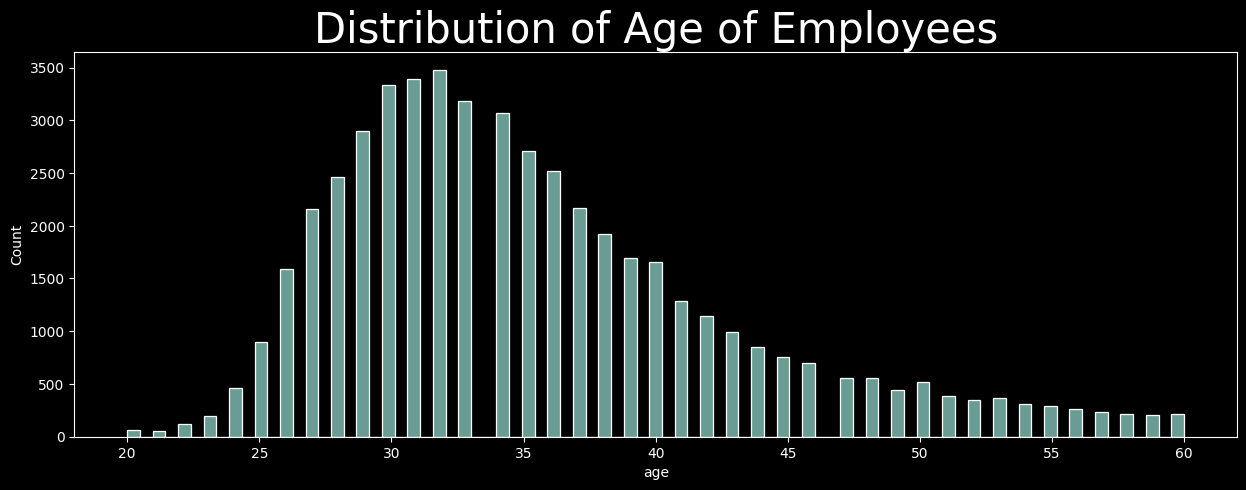

In [30]:
#age based analysis

plt.subplots(figsize=(15,5))
sns.histplot(df['age'])
plt.title('Distribution of Age of Employees',fontsize = 30)

**Visualizing distrubution of all continuous variables using Histogram**

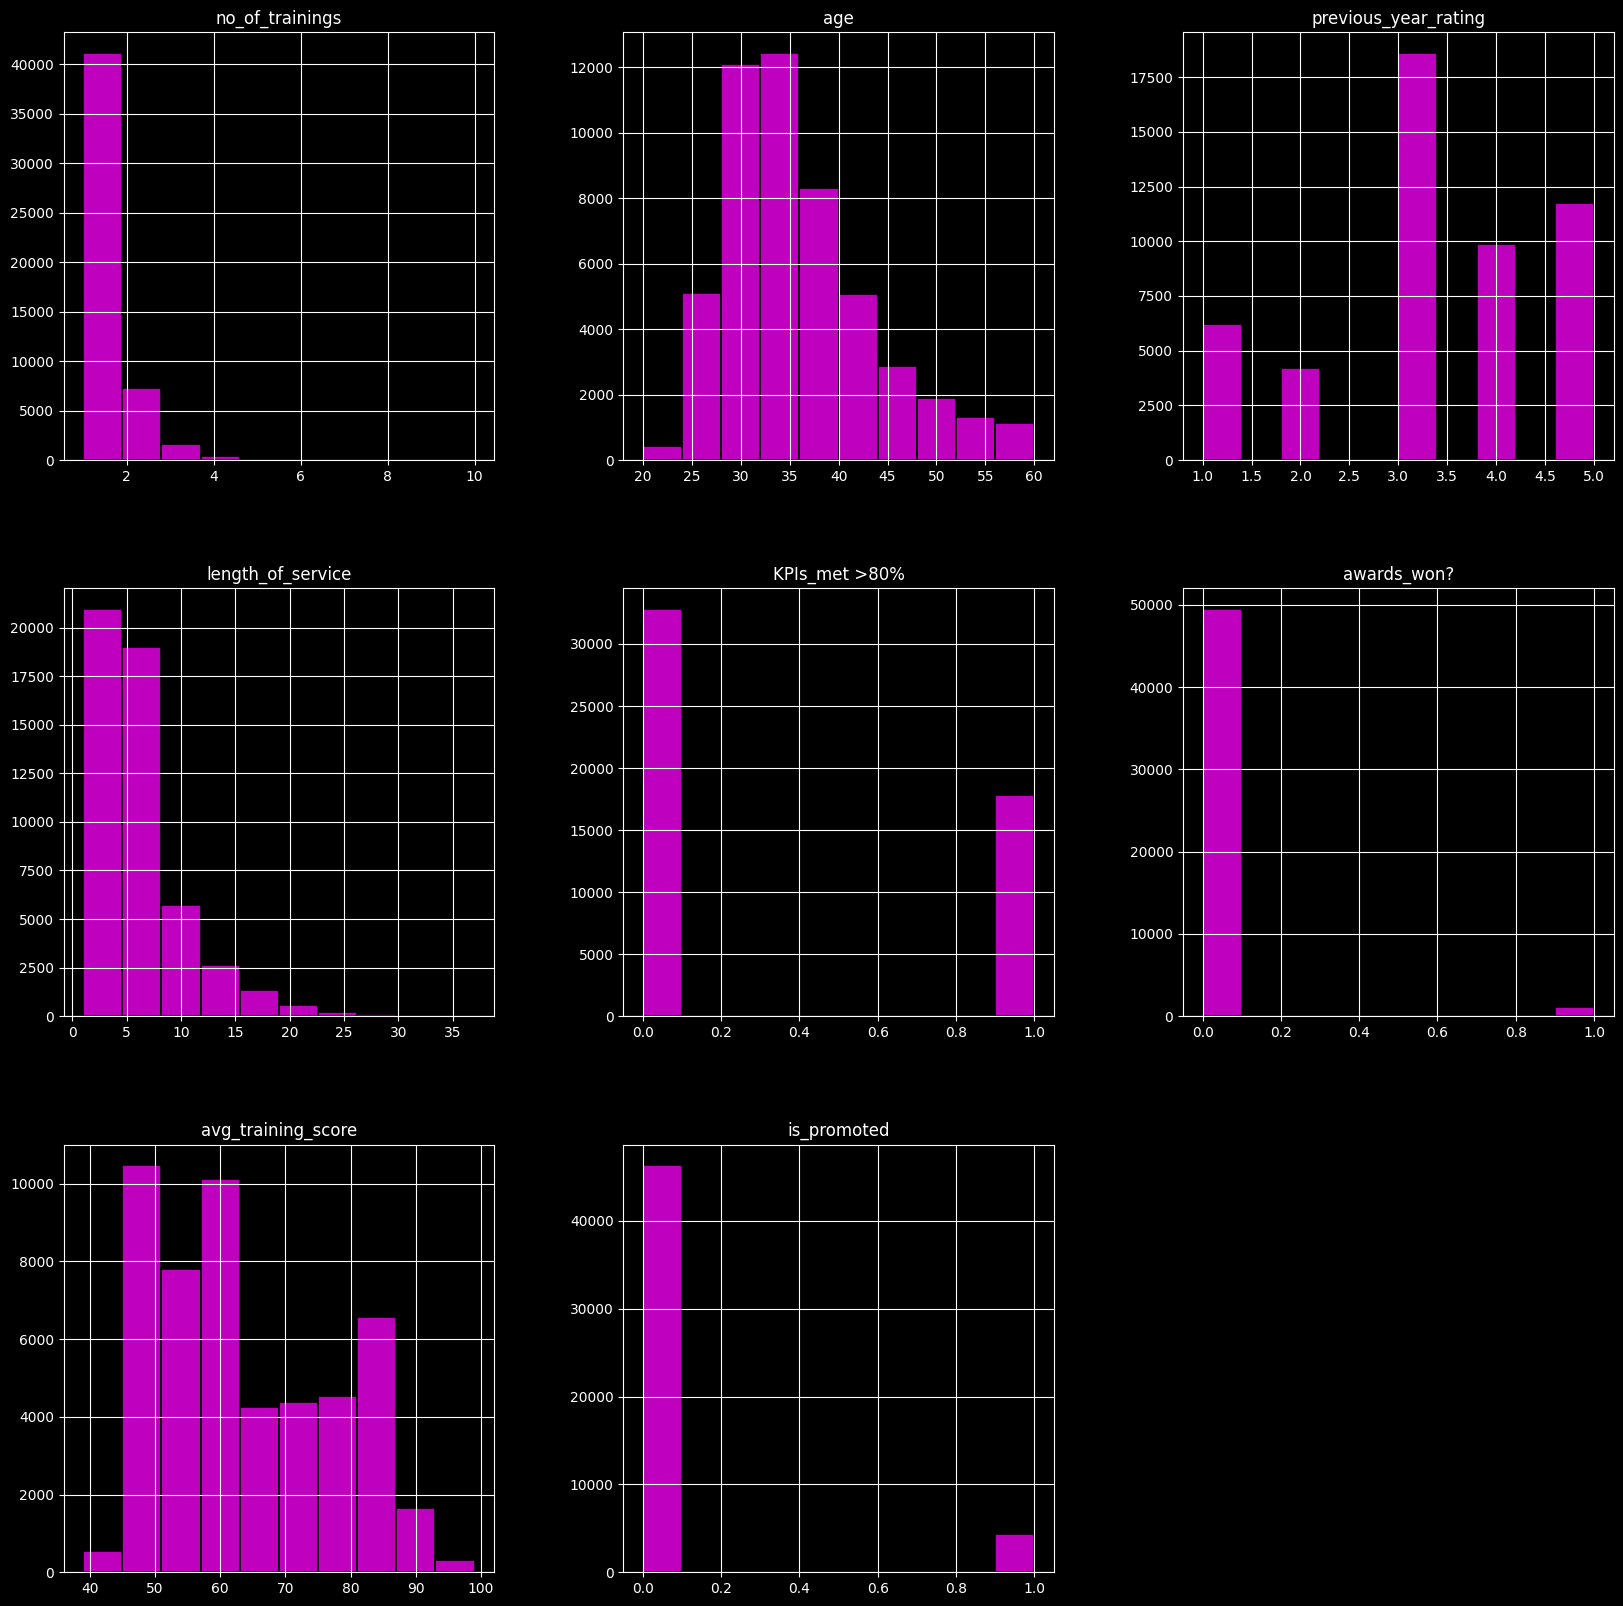

In [31]:
df.hist(color='m',edgecolor='black',linewidth=1.2,figsize=(20,20));

<Axes: ylabel='length_of_service'>

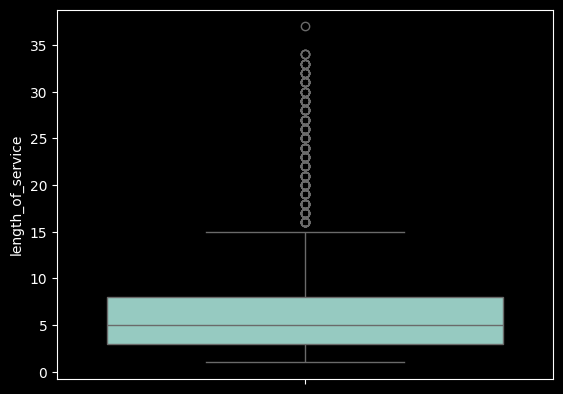

In [32]:
#Box plot of length_of_service

sns.boxplot(df['length_of_service'])

**OUTLIER REMOVAL**

Outliers are extreme values in data which are far away from the most of values.

Outlier removal is a critical step in data preprocessing, aimed at identifying and eliminating data points that deviate significantly from the rest of the dataset. By removing outliers, the integrity and accuracy of statistical analyses and machine learning models are enhanced, as outliers can distort patterns and skew results.

In [33]:
#Define a function to remove outliers using IQR

def remove_outliers_iqr(df,column):
  Q1=df[column].quantile(0.25) #Calculate the 25th percentile (Q1)
  Q3=df[column].quantile(0.75) #Calculate the 75th percentile (Q3)
  IQR=Q3-Q1 #Calculate the Interquartile Range (IQR)

  #Calculate lower and upper bounds to define outliers
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  #Filter the DataFrame to include only values within the bounds
  return df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

#Removing outliers for the 'Votes' column
df=remove_outliers_iqr(df,'length_of_service')

Text(0.5, 1.0, 'Box plot of length_of_service after removing outliers')

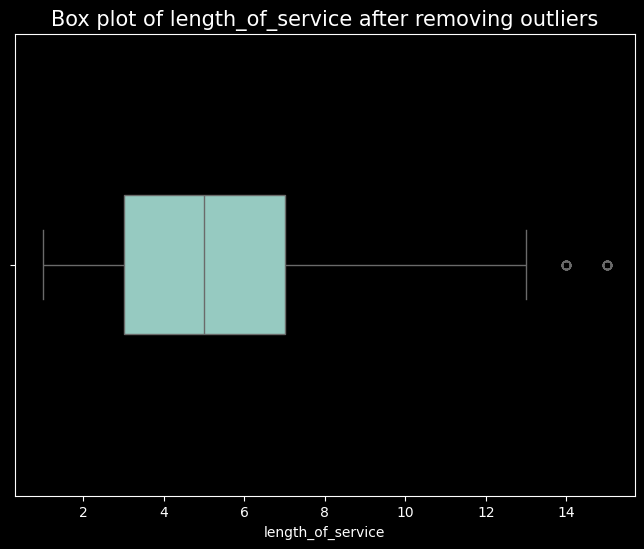

In [34]:
#Box plot of Votes after removing outliers

plt.figure(figsize=(8,6))
sns.boxplot(x='length_of_service',data=df,orient='h',width=0.3)
plt.title('Box plot of length_of_service after removing outliers',fontsize=15)

**DATA PRE-PROCESSING**

In [35]:
df.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


Encoding all categorical values using **Get dummies Encoding**

In [36]:
df1=pd.get_dummies(df[['department','region','education','gender','recruitment_channel']],drop_first=True).astype(int)   # to drop first column
df1

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54804,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
54805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,1


In [37]:
#To join two dataframes

df_train=pd.concat([df,df1],axis=1)
df_train.drop(['region','department','education','gender','recruitment_channel'],axis=1,inplace=True)
df_train

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,0,49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54804,1,37,2.0,6,0,0,56,0,0,0,...,0,0,0,0,0,1,0,0,0,0
54805,1,27,5.0,3,1,0,79,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,1,29,1.0,2,0,0,45,0,0,0,...,0,0,0,1,0,0,1,1,0,1


**FEATURE SELECTION**

Feature selection is a critical process in Machine Learning that involves choosing the most relevant features from the dataset. It plays a vital role in improving model performance, simplifying models, and enhancing interpretability. By selecting the most informative features, unnecessary noise and dimensionality are reduced, leading to more efficient and accurate predictions.

**CHI-SQUARE(χ²) TEST**

The Chi-Square (χ²) test is a statistical method used to evaluate the independence between categorical features and the target variable in a dataset. It assesses whether there is a significant association between each feature and the target variable by comparing observed frequencies with expected frequencies under the null hypothesis of independence.

In [38]:
#split into input variable and output variable

from sklearn.feature_selection import chi2
input=df_train.iloc[:,:-1]
output=df_train.iloc[:,-1]

In [39]:
#Applying Chi-Square Test

chi_score=chi2(input,output)
chi_score

(array([1.11717911e+00, 2.41525884e+00, 9.69655679e-02, 4.96556421e-01,
        7.84638303e-01, 1.53160110e+00, 5.28423226e+00, 3.21258888e-01,
        1.39077002e-01, 1.13355820e+01, 7.45305170e-01, 1.26663298e-01,
        4.01285975e-01, 1.11721754e-04, 4.81650597e+00, 1.26152280e+01,
        2.24060854e+00, 2.46753004e-02, 5.68237497e-02, 5.65042590e-01,
        7.72713971e-01, 8.44697318e-01, 2.39144150e-01, 9.68710993e-03,
        8.00003844e-01, 1.20790303e+00, 2.95212876e-01, 4.93810323e-01,
        2.21311621e+00, 3.13609005e-01, 1.63281394e+00, 1.15121613e-01,
        3.29556595e-01, 4.13780313e-01, 2.95361531e+00, 6.06052830e-03,
        1.44868386e+00, 1.68155380e-01, 2.22351791e+00, 2.63551135e+00,
        9.08762909e-01, 2.91366995e+00, 8.29332917e-01, 3.83346973e-02,
        2.36849527e+00, 1.02382079e+00, 1.14276504e+00, 7.15104400e-02,
        1.57440477e+00, 1.44186581e-01, 5.72694594e-02, 2.54865823e-02,
        2.16135541e-01, 7.43564312e+02]),
 array([2.90526677e-00

In [40]:
#Create DataFrame for Chi-sqaure values

chi_values=pd.DataFrame(chi_score[0],index=input.columns,columns=['Chi-square'])
chi_values.sort_values(by='Chi-square',ascending=False,inplace=True)
chi_values

,Chi-square
recruitment_channel_referred,743.564312
department_Technology,12.615228
department_HR,11.335582
avg_training_score,5.284232
department_Sales & Marketing,4.816506
region_region_27,2.953615
region_region_33,2.913670
region_region_31,2.635511
age,2.415259
region_region_5,2.368495


<Axes: >

<Figure size 2000x300 with 0 Axes>

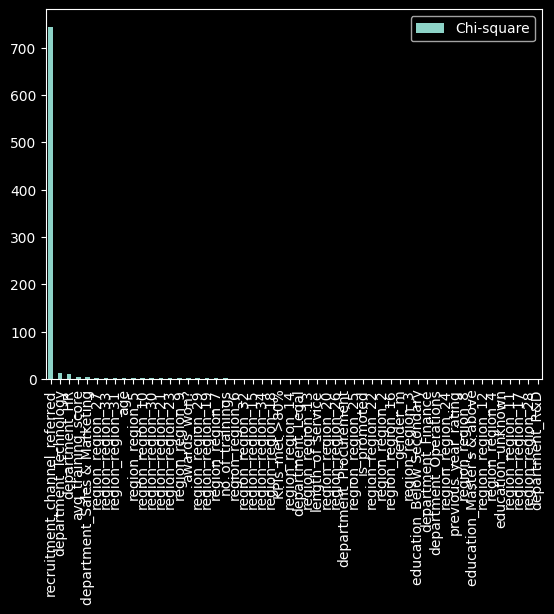

In [41]:
#Plotting Chi-square values

plt.figure(figsize=(20,3))
chi_values.plot.bar()

**Higher the chi value, Higher the importance**

In [42]:
#Create DataFrame for p values

p_values=pd.DataFrame(chi_score[1],index=input.columns,columns=['p value'])
p_values.sort_values(by='p value',ascending=False,inplace=True)
p_values

,p value
department_R&D,9.915666e-01
region_region_28,9.379479e-01
region_region_17,9.215963e-01
region_region_11,8.751789e-01
education_unknown,8.731606e-01
region_region_4,8.447726e-01
region_region_12,8.115885e-01
education_Master's & above,8.108649e-01
region_region_8,7.891501e-01
previous_year_rating,7.555019e-01


<Axes: >

<Figure size 2000x300 with 0 Axes>

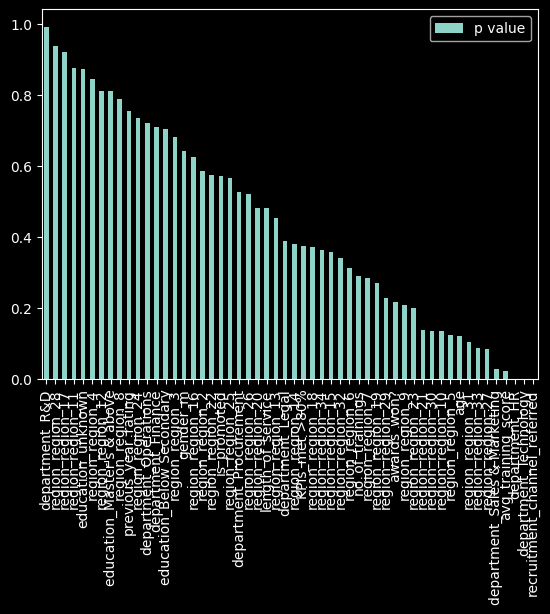

In [43]:
#Plotting p values

plt.figure(figsize=(20,3))
p_values.plot.bar()


**Higher the p value, Lower the importance**

In [44]:
#Dropping unnecessary columns

df_train=df_train.drop(columns=['region_region_11','region_region_28','region_region_12','region_region_17'])

In [45]:
#To print the dimentionality of the dataframe

df_train.shape

(48337, 51)

In [46]:
#To print the datatypes of each column

df_train.dtypes

,0
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64
awards_won?,int64
avg_training_score,int64
is_promoted,int64
department_Finance,int64
department_HR,int64


In [47]:
#Seperating input variable as x_train

x_train=df_train.drop(['is_promoted'],axis=1).values
x_train.ndim

2

In [48]:
#Seperating input variable as y_train

y_train=df_train['is_promoted'].values
y_train.ndim

1

**LOADING TESTING DATASET**

In [49]:
df2=pd.read_csv('/content/drive/MyDrive/Dataset/HR_dataset/test_2umaH9m.csv')
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [50]:
#To print the first five rows

df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [51]:
#To print the last five rows

df2.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


**DATA PRE-PROCESSING**

In [52]:
#Dropping unnecessary columns

df2=df2.drop(['employee_id'],axis=1)
df2

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [53]:
#Checking for the missing values

df2.isna().sum()

,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0
KPIs_met >80%,0


In [54]:
#Handling missing values

df2['education']=df2['education'].fillna('unknown')
df2=df2.dropna()

In [55]:
#Again checking for missing values

df2.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [56]:
#Resetting the index of the DataFrame

df2.reset_index(drop=True, inplace=True)

Encoding all categorical values using **Get dummies Encoding**

In [57]:
df3=pd.get_dummies(df2[['region','department','education','gender','recruitment_channel']],drop_first=True).astype(int)
df3

,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
21675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
21676,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
#Joining two Dataframes

x_test=pd.concat([df2,df3],axis=1)
x_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,...,0,0,1,0,0,0,0,1,0,0
2,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,...,1,0,0,0,0,0,0,0,0,0
3,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,...,0,0,0,0,0,0,0,1,0,1
4,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,Sales & Marketing,region_20,Bachelor's,m,other,1,28,4.0,2,0,...,0,0,1,0,0,0,0,1,0,0
21674,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,...,0,0,0,0,1,0,0,1,0,1
21675,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,...,0,0,0,1,0,0,0,1,0,1
21676,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
#Dropping unnecessary columns from the Dataframe

x_test=x_test.drop(['region','department','education','gender','recruitment_channel'],axis=1)
x_test=x_test.drop(columns=['region_region_11','region_region_28','region_region_12','region_region_17'])

In [60]:
x_test

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,region_region_10,region_region_13,region_region_14,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,31,3.0,5,0,0,51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,31,1.0,4,0,0,47,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,3,31,2.0,9,0,0,65,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,30,4.0,7,0,0,61,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,36,3.0,2,0,0,68,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,1,28,4.0,2,0,0,51,0,0,0,...,0,0,1,0,0,0,0,1,0,0
21674,1,24,3.0,1,0,0,61,0,0,0,...,0,0,0,0,1,0,0,1,0,1
21675,1,31,3.0,7,0,0,74,0,0,0,...,0,0,0,1,0,0,0,1,0,1
21676,1,26,4.0,4,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
#splitting into testing data x_test

x_test=x_test.iloc[:,:].values

In [62]:
#splitting into testing data y_test

y_test=y_train[:]
y_test.shape

(48337,)

In [63]:
#To print the dimensionality of x_test

x_test.shape

(21678, 50)

**NORMALIZATION**

Normalization is a technique used in data preprocessing to adjust the range of numerical features in a dataset so that they have similar scales. This process ensures that no single feature disproportionately influences the results of a machine learning model. Normalization is particularly important when the data contains features with varying units or scales, which could otherwise skew the results.


**NORMALIZATION USING MINMAX SCALER**

Normalization using the MinMaxScaler is a common technique in data preprocessing, where you scale the features of your dataset to a specific range, typically between 0 and 1. This process helps to standardize the range of independent variables or features, making them comparable and ensuring that no single feature disproportionately influences the results of your model.

The result is that the transformed data will lie within the specified range, usually [0, 1].

In [64]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x_train)
x=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_test

array([[0.        , 0.275     , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.275     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.22222222, 0.275     , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.275     , 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.15      , 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.22222222, 0.5       , 1.        , ..., 1.        , 0.        ,
        0.        ]])

**MODEL CREATION**

ALGORITHMS USED:


1. K-NEIGHBORS CLASSIFIER
2. NAIVE BAYES CLASSIFIER
3. SUPPORT VECTOR CLASSIFIER
4. DECISION TREE CLASSIFIER
5. RANDOM FOREST CLASSIFIER

**MODELLING WITH K-NEIGHBORS CLASSIFIER**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
kn=KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)
y_pred_kn=kn.predict(x_test)
y_test=y_test[ :len(y_pred_kn)]

Accuracy_KN=accuracy_score(y_test,y_pred_kn)
print("Confusion matrix is",confusion_matrix(y_test,y_pred_kn))

print('Accuracy_score:',Accuracy_KN)

Confusion matrix is [[19814     0]
 [ 1864     0]]
Accuracy_score: 0.9140142079527632


**PERFORMANCE EVALUATION OF K-NEIGHBORS CLASSIFIER MODEL**

In [66]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     19814
           1       0.00      0.00      0.00      1864

    accuracy                           0.91     21678
   macro avg       0.46      0.50      0.48     21678
weighted avg       0.84      0.91      0.87     21678



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**CONFUSION MATRIX DISPLAY OF K-NEIGHBORS CLASSIFIER MODEL**

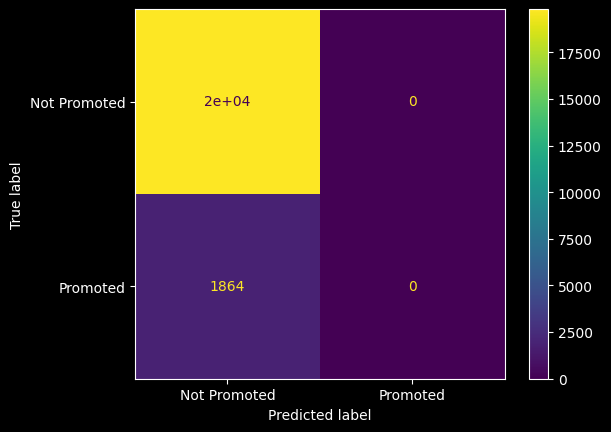

In [67]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
label=['Not Promoted','Promoted']
metrics=confusion_matrix(y_test,y_pred_kn)
dis=ConfusionMatrixDisplay(metrics,display_labels=label)
dis.plot()

**MODELLING WITH NAIVE BAYES CLASSIFIER**

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
y_test=y_test[:len(y_pred_nb)]

Accuracy_NB=accuracy_score(y_test,y_pred_nb)
print("Confusion matrix is",confusion_matrix(y_test,y_pred_nb))

print('Accuracy_score:',Accuracy_NB)

Confusion matrix is [[19709   105]
 [ 1858     6]]
Accuracy_score: 0.9094473659931728


**PERFORMANCE EVALUATION OF NAIVE BAYES CLASSIFIER MODEL**

In [69]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     19814
           1       0.05      0.00      0.01      1864

    accuracy                           0.91     21678
   macro avg       0.48      0.50      0.48     21678
weighted avg       0.84      0.91      0.87     21678



**MODELLING WITH SUPPORT VECTOR CLASSIFIER**

In [70]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
y_test=y_test[:len(y_pred_sv)]

Accuracy_SVC=accuracy_score(y_test,y_pred_sv)
print("Confusion matrix is",'\n'
,confusion_matrix(y_test,y_pred_sv))
print('Accuracy_score: ',Accuracy_SVC)

Confusion matrix is 
 [[19814     0]
 [ 1864     0]]
Accuracy_score:  0.9140142079527632


**PERFORMANCE EVALUATION OF SUPPORT VECTOR CLASSIFIER MODEL**

In [71]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     19814
           1       0.00      0.00      0.00      1864

    accuracy                           0.91     21678
   macro avg       0.46      0.50      0.48     21678
weighted avg       0.84      0.91      0.87     21678



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**MODELLING WITH DECISION TREE CLASSIFIER**

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

Accuracy_DT=accuracy_score(y_test,y_pred_dt)
print('Confusion matrix is','\n'
      ,confusion_matrix(y_test,y_pred_dt))
print('Accuracy_score:',Accuracy_DT)

Confusion matrix is 
 [[19779    35]
 [ 1860     4]]
Accuracy_score: 0.9125841867330935


**PERFORMANCE EVALUATION OF DECISION TREE CLASSIFIER MODEL**

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19814
           1       0.10      0.00      0.00      1864

    accuracy                           0.91     21678
   macro avg       0.51      0.50      0.48     21678
weighted avg       0.84      0.91      0.87     21678



In [74]:
# #Distribution of Promotion Status in the Training Data

# df6=df_train['is_promoted'].value_counts()
# df6

This shows a significant **Class Imbalance**, with far more instances of non-promotion than promotion.

This is important to consider when training models, as class imbalance can affect model performance and may require techniques like resampling, class weighting, or specialized algorithms to address.

**SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE(SMOTE)**

SMOTE is an over-sampling method used to address class imbalance in datasets.

When dealing with imbalanced datasets, where one class significantly outnumbers the other, models can become biased towards the majority class, leading to poor performance in predicting the minority class. SMOTE helps mitigate this issue by generating synthetic samples for the minority class to balance the dataset.

In [75]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x_train,y_train=smote.fit_resample(x_train,y_train) #Applying SMOTE to training data

**MODELLING WITH RANDOM FOREST CLASSIFIER**

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred_RF = clf.predict(x_test)

Accuracy_RF=accuracy_score(y_test,y_pred_RF)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     19814
           1       0.00      0.00      0.00      1864

    accuracy                           0.91     21678
   macro avg       0.46      0.50      0.48     21678
weighted avg       0.84      0.91      0.87     21678



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**PERFORMANCE EVALUATION OF RANDOM FOREST CLASSIFIER MODEL**

In [77]:
print(confusion_matrix(y_test,y_pred_RF))
print('Accuracy_score',Accuracy_RF)

[[19814     0]
 [ 1864     0]]
Accuracy_score 0.9140142079527632


In [78]:
#Creating Dataframe with actual value, predicted value and the difference

error=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred_RF,'Difference':y_test-y_pred_RF})
error

,Actual_value,Predicted_value,Difference
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
21673,1,0,1
21674,0,0,0
21675,0,0,0
21676,1,0,1


In [79]:
model=('K NEIGHBORS','NAIVE BAYES','SVC','DECISION TREE REGRESSOR','RANDOM FOREST REGRESSOR')
models=[KNeighborsClassifier,MultinomialNB,SVC,DecisionTreeClassifier,RandomForestClassifier]
from sklearn.metrics import accuracy_score
accuracy_list=[]

In [80]:
for i in models:
  print("Model Name is ",i)
  print('*'*50)
  mod=i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  accuracy=accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
  print("Accuracy score:", accuracy_score(y_test, y_pred))
print("="*50)

Model Name is  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
**************************************************
Accuracy score: 0.9140142079527632
Model Name is  <class 'sklearn.naive_bayes.MultinomialNB'>
**************************************************
Accuracy score: 0.9094473659931728
Model Name is  <class 'sklearn.svm._classes.SVC'>
**************************************************
Accuracy score: 0.9140142079527632
Model Name is  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
**************************************************
Accuracy score: 0.8937632622935695
Model Name is  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
**************************************************
Accuracy score: 0.9140142079527632


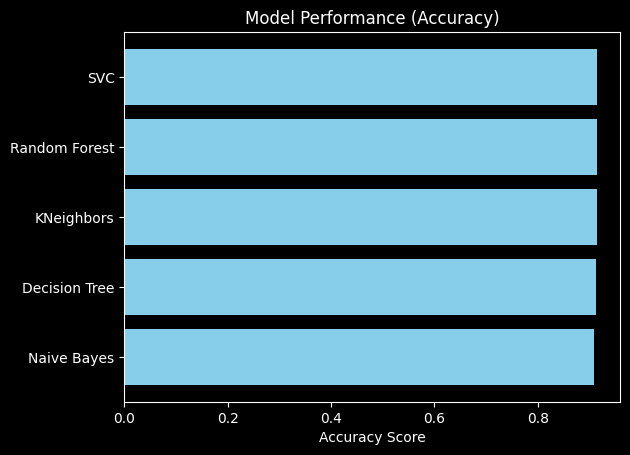

In [81]:
#Comparing accuracy scores of different models

accuracy_scores = {
    'KNeighbors': Accuracy_KN,
    'Decision Tree':Accuracy_DT,
    'Random Forest':Accuracy_RF,
    'SVC': Accuracy_SVC,
    'Naive Bayes':Accuracy_NB
}

sorted_models = sorted(accuracy_scores.items(), key=lambda x: x[1])
model_names, scores = zip(*sorted_models)
plt.barh(model_names, scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Performance (Accuracy)')
plt.show()

The **Support Vector Classifier**, **Random Forest Classifier** and **K Neighbors Classifier** stands out as the top-performing models, achieving the **highest Accuracy score**.

In [82]:
#Saving the model using pickle

import pickle
pickle.dump(kn,open('hr.pkl','wb'))
model=pickle.load(open('hr.pkl','rb'))
print(y_pred_kn)

[0 0 0 ... 0 0 0]


In [83]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.2 MB/s eta 0:00:00


In [84]:
!wget -q -O - ipv4.icanhazip.com

34.16.217.75


In [ ]:
! streamlit run app1.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app1.py
Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 